In [88]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
combined_df = pd.merge(city_df , ride_df , on = "city") 

# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

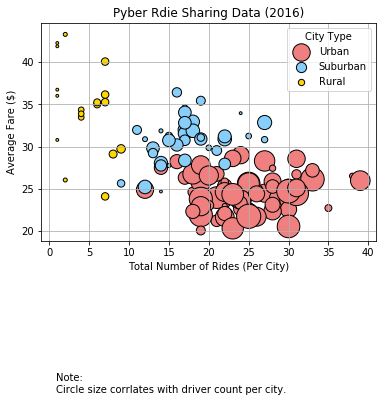

In [97]:
# Obtain the x and y coordinates for each of the three city types
urban_df = combined_df[combined_df["type"]=="Urban"]
suburban_df = combined_df[combined_df["type"]=="Suburban"]
rural_df = combined_df[combined_df["type"]=="Rural"]

# Find Average Fare ($) Per City
urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]

# Find Total Number of Rides Per City
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]

# Find Total Number of Drivers Per City
urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(urban_ride_count, urban_avg_fare , s = 8*urban_driver_count , c = "lightcoral" , marker = "o" , label = "Urban" , edgecolors = "black" )
plt.scatter(suburban_ride_count, suburban_avg_fare , s = 8*suburban_driver_count , c = "lightskyblue" , marker = "o", label = "Suburban", edgecolors = "black")
plt.scatter(rural_driver_count, rural_avg_fare , s = 8*rural_driver_count , c = "gold" , marker = "o" , label = "Rural" , edgecolors = "black" )

# Incorporate the other graph properties
# Add lables to X and Y axes :: Add title
plt.title("Pyber Rdie Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(loc = "best" , title = "City Type")

# Add in a grid
plt.grid()

# Incorporate a text label regarding circle size
plt.text(.9, .9, "Note: \nCircle size corrlates with driver count per city.")

# Save Figure
plt.savefig("Output/PyberPlot.png")

# Show plot
plt.show()

## Total Fares by City Type

([<matplotlib.patches.Wedge at 0x112898f28>,
 [Text(-1.10539,-0.467032,'Urban'),
  Text(1.08107,0.20317,'Suburban'),
  Text(0.233596,1.07491,'Rural')],
 [Text(-0.644809,-0.272436,'62.7%'),
  Text(0.589677,0.11082,'30.5%'),
  Text(0.127416,0.586315,'6.8%')])

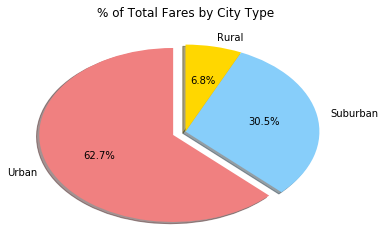

In [98]:
# Calculate Type Percents
# Calculate total fare by city type
urban_total_fare = urban_df["fare"].sum()
suburban_total_fare = suburban_df["fare"].sum()
rural_total_fare = rural_df["fare"].sum()

# Calculate combined total fare of city types
combined_total_fare = urban_total_fare + suburban_total_fare + rural_total_fare

# Calculate percentage of combined total fare by city type
urban_percent_fare = urban_total_fare/combined_total_fare
suburban_percent_fare =suburban_total_fare/combined_total_fare
rural_percent_fare = rural_total_fare/combined_total_fare

# Build Pie Chart
# Add title
plt.title("% of Total Fares by City Type")

# Labels for the sections of pie chart
labels = ["Urban", "Suburban", "Rural"]

# Values for each section of pie chart
sizes = [urban_total_fare, suburban_total_fare, rural_total_fare]

# Colors for each section of pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Separate 'Urban' section from others
explode = (0.1, 0, 0)

# Save Figure
plt.savefig("Output/TotalFaresbyCityTypePieChart.png")

# Show Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow = True, startangle = 90)

## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x110bfcf98>,
 [Text(-1.0046,-0.656338,'Urban'),
  Text(1.00735,0.441865,'Suburban'),
  Text(0.181054,1.085,'Rural')],
 [Text(-0.586017,-0.382864,'68.4%'),
  Text(0.549464,0.241017,'26.3%'),
  Text(0.0987567,0.591817,'5.3%')])

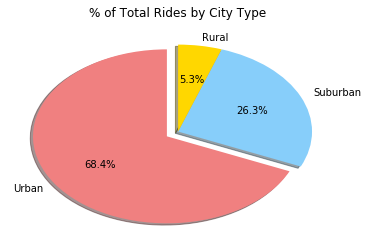

In [99]:
# Calculate Ride Percents
# Calculate total rides per city type
urban_total_rides = urban_df["ride_id"].count()
suburban_total_rides = suburban_df["ride_id"].count()
rural_total_rides = rural_df["ride_id"].count()

# Calculate combined total rides
combined_total_rides = urban_total_rides + suburban_total_rides + rural_total_rides

# Build Pie Chart
# Add title
plt.title("% of Total Rides by City Type")

# Labels for the sections of pie chart
labels = ["Urban", "Suburban", "Rural"]

# Values for each section of pie chart
sizes = [urban_total_rides, suburban_total_rides, rural_total_rides]

# Colors for each section of pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Separate 'Urban' section from others
explode = (0.1, 0, 0)

# Save Figure
plt.savefig("Output/TotalRidesbyCityTypePieChart.png")

# Show Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow = True, startangle = 90)


## Total Drivers by City Type

([<matplotlib.patches.Wedge at 0x120091940>,
 [Text(-0.677779,-0.99026,'Urban'),
  Text(0.693922,0.853506,'Suburban'),
  Text(0.0905629,1.09627,'Rural')],
 [Text(-0.395371,-0.577652,'80.9%'),
  Text(0.378503,0.465549,'16.5%'),
  Text(0.0493979,0.597963,'2.6%')])

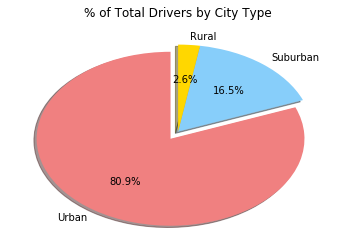

In [100]:
# Calculate Driver Percents
# Calculate total drivers by city type
driver_driver_df = pd.DataFrame(urban_driver_count)
urban_total_drivers = driver_driver_df["driver_count"].sum()

suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_df = pd.DataFrame(suburban_driver_count)
suburban_total_drivers = suburban_driver_df["driver_count"].sum()

rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]
rural_driver_df = pd.DataFrame(rural_driver_count)
rural_total_drivers = rural_driver_df["driver_count"].sum()

urban_total_drivers = driver_driver_df["driver_count"].sum()
suburban_total_drivers = suburban_driver_df["driver_count"].sum()
rural_total_drivers = rural_driver_df["driver_count"].sum()

# Calculate combined total drivers
combined_total_drivers = urban_total_drivers + suburban_total_drivers + rural_total_drivers

# Build Pie Chart
# Add title
plt.title("% of Total Drivers by City Type")

# Labels for the sections of pie chart
labels = ["Urban", "Suburban", "Rural"]

# Values for each section of pie chart
sizes = [urban_total_drivers, suburban_total_drivers, rural_total_drivers]

# Colors for each section of pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Separate 'Urban' section from others
explode = (0.1, 0, 0)

# Save Figure
plt.savefig("Output/TotalDriversbyCityTypePieChart.png")

# Show Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow = True, startangle = 90)